In [1]:
# Installing Dependencies

!pip install pycountry_convert
!pip install folium
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
!pip install keras
!pip install tensorflow
!pip install --upgrade pip

--2020-03-28 07:12:47--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [application/octet-stream]
Saving to: ‘model_deaths.h5.1’

model_deaths.h5.1   100%[===================>] 108.41K  --.-KB/s    in 0.003s  

2020-03-28 07:12:48 (41.0 MB/s) - ‘model_deaths.h5.1’ saved [111008/111008]

--2020-03-28 07:12:48--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [app

  Using cached tensorflow_estimator-2.1.0-py2.py3-none-any.whl (448 kB)
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.10.11
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.0.2)


In [6]:
#!pip install tensorflow
!conda install tensorflow --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    c-ares-1.15.0              |    h7b6447c_1001         102 KB
    gast-0.2.2                 |           py36_0         138 KB
    _tflow_select-2.3.0        |              mkl           2 KB
    markdown-3.1.1             |           py36_0         113 KB
    protobuf-3.11.4            |   py36he6710b0_0         711 KB
    tensorboard-2.0.0          |     pyhb38c66f_1         3.3 MB
    opt_einsum-3.1.0           |             py_0          54 KB
    setuptools-46.1.1          |           py36_0         660 KB

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime,timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop,Adam

%matplotlib inline

In [9]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [10]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [11]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [14]:
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,2020-03-28 07:18:48,-25.0000,133.0000,3583,403,244,2936
1,Austria,2020-03-28 07:13:56,47.5162,14.5501,7697,58,225,7414
2,Canada,2020-03-28 07:18:35,60.0010,-95.0010,4760,56,345,0
3,China,2020-03-28 05:44:34,30.5928,114.3055,81947,3299,75099,3549
4,Denmark,2020-03-28 07:13:56,56.0000,10.0000,2200,52,57,2091


In [15]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis=1)

In [19]:
df_countries_cases.index = df_countries_cases['Country_Region']

In [21]:
df_countries_cases = df_countries_cases.drop(['Country_Region'],axis=1)

In [22]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,3583,403,244,2936
Austria,7697,58,225,7414
Canada,4760,56,345,0
China,81947,3299,75099,3549
Denmark,2200,52,57,2091


In [23]:
df_countries_cases = df_countries_cases.groupby(['Country_Region']).sum()

In [25]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='Wistia',axis=1)

,Confirmed,Deaths,Recovered,Active
0,598245,27762,131777,332115


In [27]:
df_countries_cases.sort_values('Confirmed',ascending=False).style.background_gradient(cmap='Wistia')

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,104837,1711,894,0
Italy,86498,9134,10950,66414
China,81947,3299,75099,3549
Spain,65719,5138,9357,51224
Germany,50871,351,6658,43862
France,33414,1997,5707,25710
Iran,32332,2378,11133,18821
United Kingdom,14751,761,151,13839
Switzerland,12928,231,1530,11167


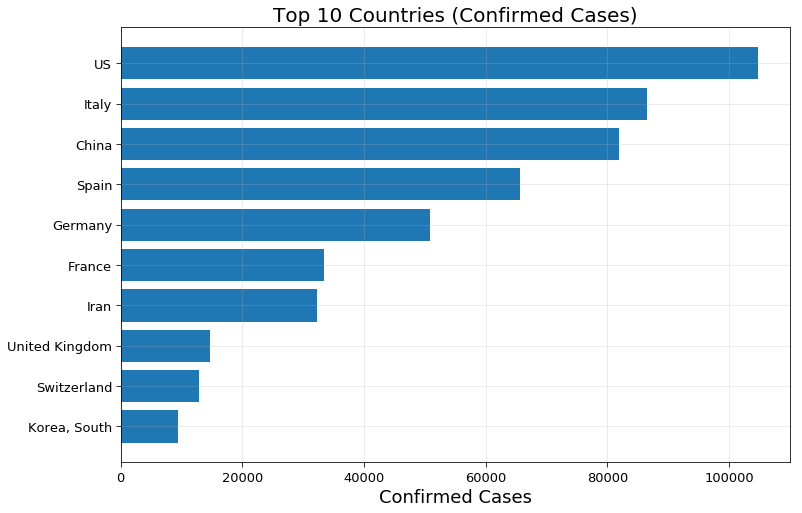

In [30]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Confirmed')['Confirmed'].index[-10:],df_countries_cases.sort_values('Confirmed')['Confirmed'].values[-10:],)
plt.tick_params(size=5,labelsize=13)
plt.xlabel('Confirmed Cases',fontsize=18)
plt.title('Top 10 Countries (Confirmed Cases)',fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

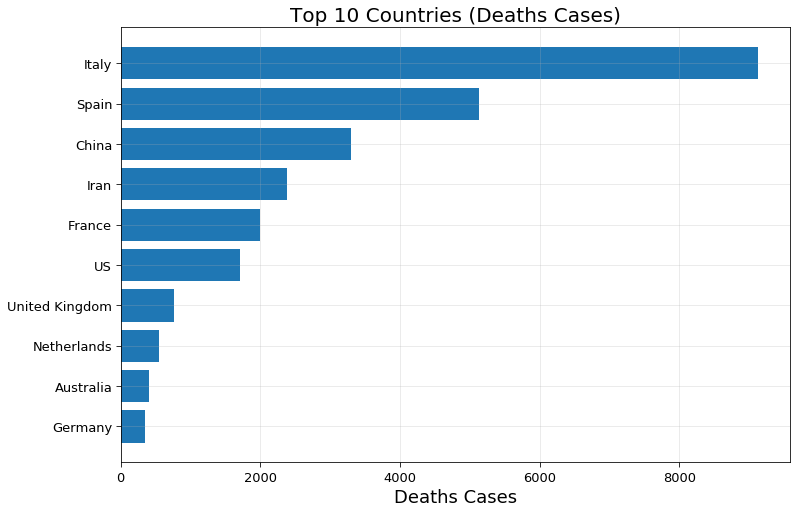

In [35]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Deaths')['Deaths'].index[-10:],df_countries_cases.sort_values('Deaths')['Deaths'].values[-10:],)
plt.tick_params(size=5,labelsize=13)
plt.xlabel('Deaths Cases',fontsize=18)
plt.title('Top 10 Countries (Deaths Cases)',fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

In [34]:
df_countries_cases.corr().style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Recovered,Active
Confirmed,1,0.80532,0.592769,0.697828
Deaths,0.80532,1,0.47418,0.844972
Recovered,0.592769,0.47418,1,0.249028
Active,0.697828,0.844972,0.249028,1


In [38]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map